<a href="https://colab.research.google.com/github/rahul0425/IE_mask_detection/blob/main/IE_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras import layers,models

In [ ]:
uploaded= files.upload()

Saving dataset1.zip to dataset1.zip


In [ ]:
!unzip dataset1.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/with_mask/1576.jpg  
  inflating: dataset/with_mask/1577.jpg  
  inflating: dataset/with_mask/1578.jpg  
  inflating: dataset/with_mask/1579.jpg  
  inflating: dataset/with_mask/158-with-mask.jpg  
  inflating: dataset/with_mask/158.jpg  
  inflating: dataset/with_mask/1580.jpg  
  inflating: dataset/with_mask/1581.jpg  
  inflating: dataset/with_mask/1582.jpg  
  inflating: dataset/with_mask/1583.jpg  
  inflating: dataset/with_mask/1584.jpg  
  inflating: dataset/with_mask/1585.jpg  
  inflating: dataset/with_mask/1586.jpg  
  inflating: dataset/with_mask/1587.jpg  
  inflating: dataset/with_mask/1588.jpg  
  inflating: dataset/with_mask/1589.jpg  
  inflating: dataset/with_mask/159-with-mask.jpg  
  inflating: dataset/with_mask/159.jpg  
  inflating: dataset/with_mask/1590.jpg  
  inflating: dataset/with_mask/1591.jpg  
  inflating: dataset/with_mask/1592.jpg  
  inflating: dataset/with_mask/1593.jpg  
  inflati

Found 8872 images belonging to 2 classes.
Found 2217 images belonging to 2 classes.


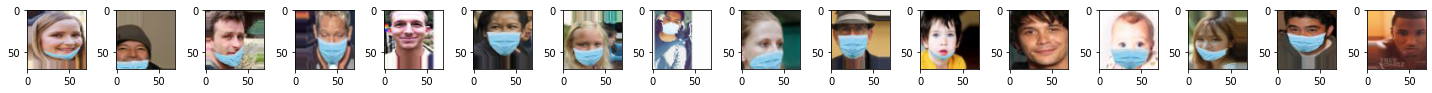

[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]


In [ ]:
directory='dataset'
train_data= ImageDataGenerator(validation_split=0.2, rescale=1./255,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=0.2
                               )
train= train_data.flow_from_directory(directory,
                                      target_size=(70,70),
                                      batch_size=16,
                                      color_mode='rgb',
                                      class_mode='binary',
                                      seed=2020,
                                      subset='training'
                                      )
test=train_data.flow_from_directory(directory,
                                      target_size=(70,70),
                                      batch_size=16,
                                      color_mode='rgb',
                                      class_mode='binary',
                                      subset='validation')
img,labels= next(train)

def plotImages(images_arr):
  fig,axes= plt.subplots(1,16,figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


plotImages(img)
print(labels)


In [ ]:
def get_model():
  model=models.Sequential()
  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[70,70,3],padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
  
  #model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))

  #model.add(layers.BatchNormalization())

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))

  model.summary()

  return model


In [ ]:
classifier= get_model()
classifier.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])

history= classifier.fit(train, epochs=20, validation_data=test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
up=files.upload()

Saving 1s.jpg to 1s.jpg
Saving 2s.jpg to 2s.jpg
Saving 3s.jpg to 3s.jpg
Saving 4s.jpg to 4s.jpg
Saving 5s.jpg to 5s.jpg
Saving 6s.jpg to 6s.jpg
Saving 7s.jpg to 7s.jpg
Saving 8s.jpg to 8s.jpg
Saving 9s.jpg to 9s.jpg
Saving 10s.jpg to 10s.jpg
Saving 11.jpg to 11.jpg
Saving 12s.png to 12s.png
Saving 13s.png to 13s.png
Saving 14s.png to 14s.png
Saving 15s.png to 15s.png
Saving 16s.png to 16s.png


In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
image_file = take_photo()

<IPython.core.display.Javascript object>

photo.jpg
400 300


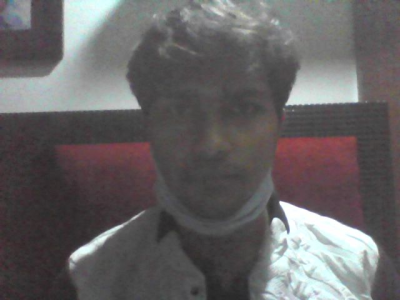

In [ ]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)
print(image_file)
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

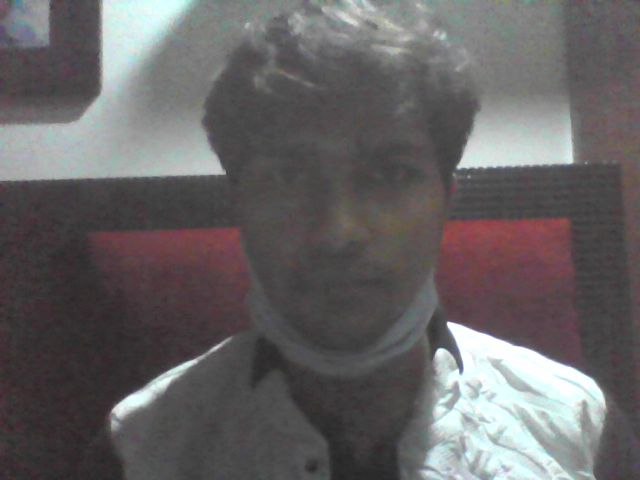



with mask


In [ ]:
from IPython.display import Image,display
from keras.preprocessing import image        
import numpy as np
img_directory= 'photo.jpg'
img_pred=image.load_img(img_directory,target_size=(70,70))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

prediction=classifier.predict(img_pred)
display(Image(img_directory,width=150,height=150))
print('\n')
if(int(prediction[0][0])==0):
  print("with mask")
else:
  print("without mask")

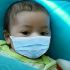



without mask


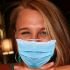



with mask


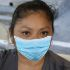



with mask


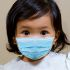



with mask


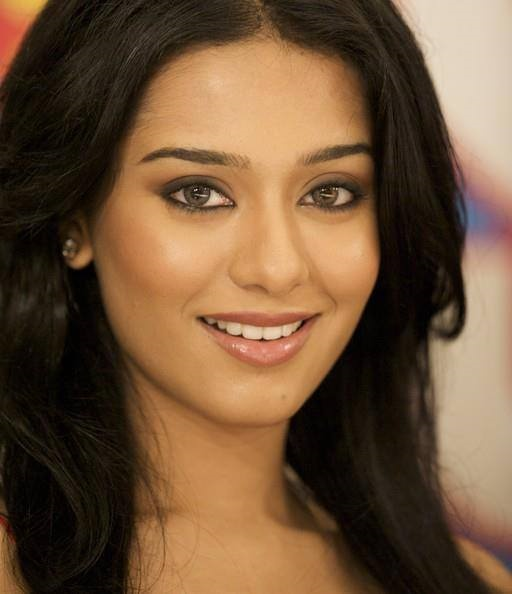



without mask


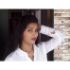



with mask


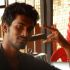



without mask


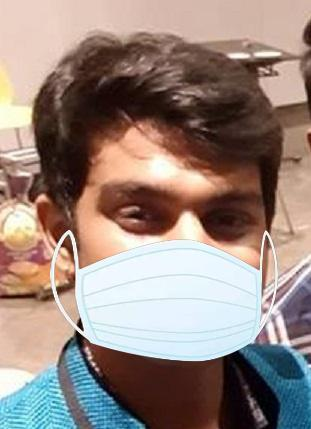



with mask


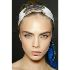



without mask


In [ ]:
from IPython.display import Image,display
from keras.preprocessing import image        
import numpy as np
for i in range(1,10):
  img_directory= str(i)+'s.jpg'
  img_pred=image.load_img(img_directory,target_size=(70,70))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred,axis=0)

  prediction=classifier.predict(img_pred)
  display(Image(img_directory,width=150,height=150))
  print('\n')
  if(int(prediction[0][0])==0):
    print("with mask")
  else:
    print("without mask")